In [1]:
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames

from abstract_defs import *
from transformations import *

In [17]:
from scipy.stats import ortho_group 
P = ortho_group.rvs(dim=3)

order_0 = np.array([0, 0, 0])
#eigs = np.array([1+1j, 1-1j, -1])
#P = np.array([[1, 1, 0],
#              [1j, -1j, 0],
#              [0, 0, 1]])
#P_inv = np.linalg.inv(P)
#print(P*np.diag(eigs)*P_inv)
order_1 = np.array([[-0.1, 0, 0],
                    [0, 0.1, 1],
                    [0, -1, 0.1]])
#P = np.array([[1, 2, 3],
#              [1, 1, 1],
#              [1, -2, -3]])
P_inv = np.linalg.inv(P)
order_1_mod = P @ order_1 @ P_inv
order_2 = 0.1*np.random.rand(3, 3, 3)
f = VectorPolynomial([order_0, order_1_mod, order_2])
print(f)

entry 1: 0 + 
0.09268475927871256 * x1 + -0.3136292851307229 * x2 + -0.9308437050866295 * x3 + 
0.06760947105991831 * x1^2 + 0.05900892353266327 * x1 * x2 + 0.09589031981904081 * x1 * x3 + 0.08747352677075051 * x2 * x1 + 0.08732512981125488 * x2^2 + 0.03111926821666401 * x2 * x3 + 0.031625969722151946 * x3 * x1 + 0.052021685751744706 * x3 * x2 + 0.010848604833048859 * x3^2 

entry 2: 0 + 
0.24160775253311442 * x1 + -0.0772703508790273 * x2 + 0.24352255007656465 * x3 + 
0.06395834163145901 * x1^2 + 0.06970689618939312 * x1 * x2 + 0.06767360501960516 * x1 * x3 + 0.08596496707340745 * x2 * x1 + 0.06710569984101582 * x2^2 + 0.06479089952385146 * x2 * x3 + 0.006540929244466476 * x3 * x1 + 0.06864897290180436 * x3 * x2 + 0.025225117062387194 * x3^2 

entry 3: 0 + 
0.9520814175830283 * x1 + -0.13897557335117258 * x2 + 0.08458559160031448 * x3 + 
0.07196477664969557 * x1^2 + 0.016583480327962263 * x1 * x2 + 0.061234250577944876 * x1 * x3 + 0.09241693419784214 * x2 * x1 + 0.013946292771309987 *

In [18]:
from utils import conjugate_dynamics

base_point = np.array([0, 0, 0])
x_prime = translate(shift=base_point, dynamics=f, debug=False)
y = diagonalize(x_prime, debug=False)
z = normal_form(y, debug=False)
print(z)

Transformation: x' = x - [0 0 0], y = [[ 0.69405468+1.95477057e-16j -0.12971156+1.99997584e-01j
   0.03824935+6.78233711e-01j]
 [ 0.69405468-2.09531797e-16j -0.12971156-1.99997584e-01j
   0.03824935-6.78233711e-01j]
 [-0.19124906-2.16151065e-17j -0.94146256+6.15030079e-18j
   0.27761852-1.81360095e-18j]]*x', z = y + J(y, y) + K(y, y, y) 
z_dot = entry 1: 0 + 
(0.09999999999999981+0.9999999999999999j) * x1 

entry 2: 0 + 
(0.09999999999999981-0.9999999999999999j) * x2 

entry 3: 0 + 
(-0.10000000000000002+0j) * x3 




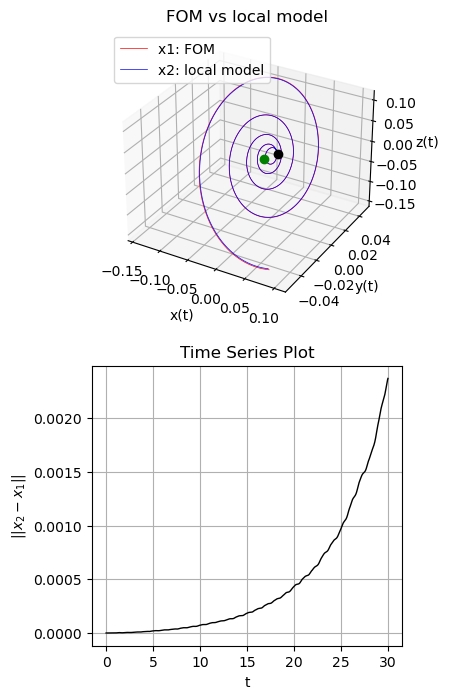

In [19]:
def compare_traces(t, ys1, ys2, base_point):
    x1, y1, z1 = ys1[0:3, :]
    x2, y2, z2 = ys2[0:3, :]
    diff = np.linalg.norm(ys2-ys1, axis=0)
    #f, (ax1, ax2) = plt.subplots(2, 1, figsize = (xsize, ysize))
    fig = plt.figure(figsize=plt.figaspect(2))
    ax1 = fig.add_subplot(2, 1, 1, projection='3d')
    ax1.plot(x1, y1, z1, linewidth = 0.5, color = 'r')
    ax1.plot(x2, y2, z2, linewidth = 0.5, color = 'b')
    ax1.plot(x1[0], y1[0], z1[0], 'ko')
    ax1.plot(base_point[0], base_point[1], base_point[2], 'go')   
    ax1.grid(True)
    ax1.set_xlabel('x(t)')
    ax1.set_ylabel('y(t)')
    ax1.set_zlabel('z(t)')
    ax1.set_title('FOM vs local model')
    ax1.legend(['x1: FOM','x2: local model'], loc = 2)
    
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(t, diff, linewidth = 1, color = 'k') 
    ax2.grid(True)
    ax2.set_xlabel('t')
    ax2.set_ylabel('$||x_2-x_1||$')
    ax2.set_title('Time Series Plot')
    
    plt.show()
    return

max_T = 30
npoints = max_T*100+1
offset = 0.01*np.array((1, 1, 0))
t_eval = np.linspace(0, max_T, npoints)
x0 = base_point+offset
sol = integrate.solve_ivp(f, (0, max_T), x0, method='RK45', t_eval=t_eval, atol=1e-10)
t = sol.t
ys = sol.y

ys_pred = conjugate_dynamics(z, t_eval, x0)
compare_traces(t_eval, ys[:, :npoints], ys_pred, base_point)
